# Williams %R + MACD — VOLAR vs NIFTY Top-N, Fees-Aware, Cooldown, Hybrid Sizing

Upgrades: VOLAR≥multiplier×NIFTY, within X% of 52W high, Top-N daily; ATR% floor; cooldown; time stop; ATR trail; hybrid sizing; transaction-cost-aware entries; zero-cost toggle.

In [1]:

# %pip install yfinance pandas numpy matplotlib
import math, os, json, warnings
from dataclasses import dataclass, asdict
from typing import Dict, Any, Tuple, List, Optional
import numpy as np, pandas as pd, matplotlib.pyplot as plt, yfinance as yf
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(11,5); plt.rcParams["axes.grid"]=True


In [2]:

CFG = {
    "TICKERS": ['360ONE.NS', '3MINDIA.NS', 'AADHARHFC.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ABB.NS', 'ABBOTINDIA.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABLBL.NS', 'ABREL.NS', 'ABSLAMC.NS', 'ACC.NS', 'ACE.NS', 'ACMESOLAR.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'AEGISLOG.NS', 'AEGISVOPAK.NS', 'AFCONS.NS', 'AFFLE.NS', 'AGARWALEYE.NS', 'AIAENG.NS', 'AIIL.NS', 'AJANTPHARM.NS', 'AKUMS.NS', 'AKZOINDIA.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALOKINDS.NS', 'AMBER.NS', 'AMBUJACEM.NS', 'ANANDRATHI.NS', 'ANANTRAJ.NS', 'ANGELONE.NS', 'APARINDS.NS', 'APLAPOLLO.NS', 'APLLTD.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'APTUS.NS', 'ARE&M.NS', 'ASAHIINDIA.NS', 'ASHOKLEY.NS', 'ASIANPAINT.NS', 'ASTERDM.NS', 'ASTRAL.NS', 'ASTRAZEN.NS', 'ATGL.NS', 'ATHERENERG.NS', 'ATUL.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AWL.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJAJHFL.NS', 'BAJAJHLDNG.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BALRAMCHIN.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'BASF.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BBTC.NS', 'BDL.NS', 'BEL.NS', 'BEML.NS', 'BERGEPAINT.NS', 'BHARATFORG.NS', 'BHARTIARTL.NS', 'BHARTIHEXA.NS', 'BHEL.NS', 'BIKAJI.NS', 'BIOCON.NS', 'BLS.NS', 'BLUEDART.NS', 'BLUEJET.NS', 'BLUESTARCO.NS', 'BOSCHLTD.NS', 'BPCL.NS', 'BRIGADE.NS', 'BRITANNIA.NS', 'BSE.NS', 'BSOFT.NS', 'CAMPUS.NS', 'CAMS.NS', 'CANBK.NS', 'CANFINHOME.NS', 'CAPLIPOINT.NS', 'CARBORUNIV.NS', 'CASTROLIND.NS', 'CCL.NS', 'CDSL.NS', 'CEATLTD.NS', 'CENTRALBK.NS', 'CENTURYPLY.NS', 'CERA.NS', 'CESC.NS', 'CGCL.NS', 'CGPOWER.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 'CHENNPETRO.NS', 'CHOICEIN.NS', 'CHOLAFIN.NS', 'CHOLAHLDNG.NS', 'CIPLA.NS', 'CLEAN.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COFORGE.NS', 'COHANCE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CONCORDBIO.NS', 'COROMANDEL.NS', 'CRAFTSMAN.NS', 'CREDITACC.NS', 'CRISIL.NS', 'CROMPTON.NS', 'CUB.NS', 'CUMMINSIND.NS', 'CYIENT.NS', 'DABUR.NS', 'DALBHARAT.NS', 'DATAPATTNS.NS', 'DBREALTY.NS', 'DCMSHRIRAM.NS', 'DEEPAKFERT.NS', 'DEEPAKNTR.NS', 'DELHIVERY.NS', 'DEVYANI.NS', 'DIVISLAB.NS', 'DIXON.NS', 'DLF.NS', 'DMART.NS', 'DOMS.NS', 'DRREDDY.NS', 'ECLERX.NS', 'EICHERMOT.NS', 'EIDPARRY.NS', 'EIHOTEL.NS', 'ELECON.NS', 'ELGIEQUIP.NS', 'EMAMILTD.NS', 'EMCURE.NS', 'ENDURANCE.NS', 'ENGINERSIN.NS', 'ENRIN.NS', 'ERIS.NS', 'ESCORTS.NS', 'ETERNAL.NS', 'EXIDEIND.NS', 'FACT.NS', 'FEDERALBNK.NS', 'FINCABLES.NS', 'FINPIPE.NS', 'FIRSTCRY.NS', 'FIVESTAR.NS', 'FLUOROCHEM.NS', 'FORCEMOT.NS', 'FORTIS.NS', 'FSL.NS', 'GAIL.NS', 'GESHIP.NS', 'GICRE.NS', 'GILLETTE.NS', 'GLAND.NS', 'GLAXO.NS', 'GLENMARK.NS', 'GMDCLTD.NS', 'GMRAIRPORT.NS', 'GODFRYPHLP.NS', 'GODIGIT.NS', 'GODREJAGRO.NS', 'GODREJCP.NS', 'GODREJIND.NS', 'GODREJPROP.NS', 'GPIL.NS', 'GRANULES.NS', 'GRAPHITE.NS', 'GRASIM.NS', 'GRAVITA.NS', 'GRSE.NS', 'GSPL.NS', 'GUJGASLTD.NS', 'GVT&D.NS', 'HAL.NS', 'HAPPSTMNDS.NS', 'HAVELLS.NS', 'HBLENGINE.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEG.NS', 'HEROMOTOCO.NS', 'HEXT.NS', 'HFCL.NS', 'HINDALCO.NS', 'HINDCOPPER.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HOMEFIRST.NS', 'HONASA.NS', 'HONAUT.NS', 'HSCL.NS', 'HUDCO.NS', 'HYUNDAI.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'IDBI.NS', 'IDEA.NS', 'IDFCFIRSTB.NS', 'IEX.NS', 'IFCI.NS', 'IGIL.NS', 'IGL.NS', 'IIFL.NS', 'IKS.NS', 'INDGN.NS', 'INDHOTEL.NS', 'INDIACEM.NS', 'INDIAMART.NS', 'INDIANB.NS', 'INDIGO.NS', 'INDUSINDBK.NS', 'INDUSTOWER.NS', 'INFY.NS', 'INOXINDIA.NS', 'INOXWIND.NS', 'INTELLECT.NS', 'IOB.NS', 'IOC.NS', 'IPCALAB.NS', 'IRB.NS', 'IRCON.NS', 'IRCTC.NS', 'IREDA.NS', 'IRFC.NS', 'ITC.NS', 'ITCHOTELS.NS', 'ITI.NS', 'J&KBANK.NS', 'JBCHEPHARM.NS', 'JBMA.NS', 'JINDALSAW.NS', 'JINDALSTEL.NS', 'JIOFIN.NS', 'JKCEMENT.NS', 'JKTYRE.NS', 'JMFINANCIL.NS', 'JPPOWER.NS', 'JSL.NS', 'JSWENERGY.NS', 'JSWINFRA.NS', 'JSWSTEEL.NS', 'JUBLFOOD.NS', 'JUBLINGREA.NS', 'JUBLPHARMA.NS', 'JWL.NS', 'JYOTHYLAB.NS', 'JYOTICNC.NS', 'KAJARIACER.NS', 'KALYANKJIL.NS', 'KARURVYSYA.NS', 'KAYNES.NS', 'KEC.NS', 'KEI.NS', 'KFINTECH.NS', 'KIMS.NS', 'KIRLOSBROS.NS', 'KIRLOSENG.NS', 'KOTAKBANK.NS', 'KPIL.NS', 'KPITTECH.NS', 'KPRMILL.NS', 'KSB.NS', 'LALPATHLAB.NS', 'LATENTVIEW.NS', 'LAURUSLABS.NS', 'LEMONTREE.NS', 'LICHSGFIN.NS', 'LICI.NS', 'LINDEINDIA.NS', 'LLOYDSME.NS', 'LODHA.NS', 'LT.NS', 'LTF.NS', 'LTFOODS.NS', 'LTIM.NS', 'LTTS.NS', 'LUPIN.NS', 'M&M.NS', 'M&MFIN.NS', 'MAHABANK.NS', 'MAHSCOOTER.NS', 'MAHSEAMLES.NS', 'MANAPPURAM.NS', 'MANKIND.NS', 'MANYAVAR.NS', 'MAPMYINDIA.NS', 'MARICO.NS', 'MARUTI.NS', 'MAXHEALTH.NS', 'MAZDOCK.NS', 'MCX.NS', 'MEDANTA.NS', 'METROPOLIS.NS', 'MFSL.NS', 'MGL.NS', 'MINDACORP.NS', 'MMTC.NS', 'MOTHERSON.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MRF.NS', 'MRPL.NS', 'MSUMI.NS', 'MUTHOOTFIN.NS', 'NAM-INDIA.NS', 'NATCOPHARM.NS', 'NATIONALUM.NS', 'NAUKRI.NS', 'NAVA.NS', 'NAVINFLUOR.NS', 'NBCC.NS', 'NCC.NS', 'NESTLEIND.NS', 'NETWEB.NS', 'NEULANDLAB.NS', 'NEWGEN.NS', 'NH.NS', 'NHPC.NS', 'NIACL.NS', 'NIVABUPA.NS', 'NLCINDIA.NS', 'NMDC.NS', 'NSLNISP.NS', 'NTPC.NS', 'NTPCGREEN.NS', 'NUVAMA.NS', 'NUVOCO.NS', 'NYKAA.NS', 'OBEROIRLTY.NS', 'OFSS.NS', 'OIL.NS', 'OLAELEC.NS', 'OLECTRA.NS', 'ONESOURCE.NS', 'ONGC.NS', 'PAGEIND.NS', 'PATANJALI.NS', 'PAYTM.NS', 'PCBL.NS', 'PERSISTENT.NS', 'PETRONET.NS', 'PFC.NS', 'PFIZER.NS', 'PGEL.NS', 'PGHH.NS', 'PHOENIXLTD.NS', 'PIDILITIND.NS', 'PIIND.NS', 'PNB.NS', 'PNBHOUSING.NS', 'POLICYBZR.NS', 'POLYCAB.NS', 'POLYMED.NS', 'POONAWALLA.NS', 'POWERGRID.NS', 'POWERINDIA.NS', 'PPLPHARMA.NS', 'PRAJIND.NS', 'PREMIERENE.NS', 'PRESTIGE.NS', 'PTCIL.NS', 'PVRINOX.NS', 'RADICO.NS', 'RAILTEL.NS', 'RAINBOW.NS', 'RAMCOCEM.NS', 'RBLBANK.NS', 'RCF.NS', 'RECLTD.NS', 'REDINGTON.NS', 'RELIANCE.NS', 'RELINFRA.NS', 'RHIM.NS', 'RITES.NS', 'RKFORGE.NS', 'RPOWER.NS', 'RRKABEL.NS', 'RVNL.NS', 'SAGILITY.NS', 'SAIL.NS', 'SAILIFE.NS', 'SAMMAANCAP.NS', 'SAPPHIRE.NS', 'SARDAEN.NS', 'SAREGAMA.NS', 'SBFC.NS', 'SBICARD.NS', 'SBILIFE.NS', 'SBIN.NS', 'SCHAEFFLER.NS', 'SCHNEIDER.NS', 'SCI.NS', 'SHREECEM.NS', 'SHRIRAMFIN.NS', 'SHYAMMETL.NS', 'SIEMENS.NS', 'SIGNATURE.NS', 'SJVN.NS', 'SKFINDIA.NS', 'SOBHA.NS', 'SOLARINDS.NS', 'SONACOMS.NS', 'SONATSOFTW.NS', 'SRF.NS', 'STARHEALTH.NS', 'SUMICHEM.NS', 'SUNDARMFIN.NS', 'SUNDRMFAST.NS', 'SUNPHARMA.NS', 'SUNTV.NS', 'SUPREMEIND.NS', 'SUZLON.NS', 'SWANCORP.NS', 'SWIGGY.NS', 'SYNGENE.NS', 'SYRMA.NS', 'TARIL.NS', 'TATACHEM.NS', 'TATACOMM.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 'TATAINVEST.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TATATECH.NS', 'TBOTEK.NS', 'TCS.NS', 'TECHM.NS', 'TECHNOE.NS', 'TEJASNET.NS', 'THELEELA.NS', 'THERMAX.NS', 'TIINDIA.NS', 'TIMKEN.NS', 'TITAGARH.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'TRENT.NS', 'TRIDENT.NS', 'TRITURBINE.NS', 'TRIVENI.NS', 'TTML.NS', 'TVSMOTOR.NS', 'UBL.NS', 'UCOBANK.NS', 'ULTRACEMCO.NS', 'UNIONBANK.NS', 'UNITDSPR.NS', 'UNOMINDA.NS', 'UPL.NS', 'USHAMART.NS', 'UTIAMC.NS', 'VBL.NS', 'VEDL.NS', 'VENTIVE.NS', 'VGUARD.NS', 'VIJAYA.NS', 'VMM.NS', 'VOLTAS.NS', 'VTL.NS', 'WAAREEENER.NS', 'WELCORP.NS', 'WELSPUNLIV.NS', 'WHIRLPOOL.NS', 'WIPRO.NS', 'WOCKPHARMA.NS', 'YESBANK.NS', 'ZEEL.NS', 'ZENSARTECH.NS', 'ZENTEC.NS', 'ZFCVINDIA.NS', 'ZYDUSLIFE.NS'],
    "NIFTY_SYMBOL": "^NSEI",
    "START": "2015-01-01", "END": "2025-01-01",
    "WR_LEN": 14, "MACD_FAST": 12, "MACD_SLOW": 26, "MACD_SIGNAL": 9,
    "SMA_LEN": 50, "ATR_LEN": 14,
    "USE_MACD_RISING": True, "RECENT_OVERSOLD_WINDOW": 20,
    "MACD_EXIT": True, "ATR_STOP_MULT": 1.5, "RR_TARGET": 2.0,
    "USE_TRAIL_ATR": False, "TRAIL_ATR_MULT": 2.0,
    "MAX_HOLD_BARS": 15, "TIME_STOP_MIN_R": 0.5,
    "SLIPPAGE_BPS": 5, "ZERO_COST": False,
    "GROWW": {"BROKERAGE_CAP":20.0,"BROKERAGE_RATE":0.001,"BROKERAGE_MIN":5.0,"STT_DELIVERY":0.001,
              "STAMP_DELIVERY_BUY":0.00015,"EXCH_NSE":0.0000297,"SEBI":0.000001,"IPFT_NSE":0.000001,
              "DP_BASE_SELL":20.0,"GST":0.18},
    "START_EQUITY": 1_000_000.0, "NOTIONAL_PER_TRADE": 50_000.0,
    "RISK_PCT": 0.02, "SIZING_MODE": "min", "MAX_OPEN_POS": 10, "EQUITY_MODE": "mtm",
    "VOLAR_LOOKBACK": 252, "VOLAR_NIFTY_MULT": 1.20, "WITHIN_52W_PCT": 0.10, "TOP_N_RANKED": 3,
    "ATR_PCT_FLOOR": 2.0, "COOLDOWN_BARS": 15,
    "MIN_EXPECTED_MOVE_ATR_MULT": 0.5, "FEES_MULTIPLIER_TO_CLEAR": 2.0,
    "OUT_DIR": "outputs"
}
os.makedirs(CFG["OUT_DIR"], exist_ok=True)


In [3]:

def sma(s,n): return s.rolling(n, min_periods=n).mean()
def atr(df,n=14):
    h,l,c=df["High"],df["Low"],df["Close"]; pc=c.shift(1)
    tr=pd.concat([(h-l).abs(),(h-pc).abs(),(l-pc).abs()],axis=1).max(axis=1)
    return tr.rolling(n, min_periods=n).mean()
def williams_r(df,n=14):
    hh=df["High"].rolling(n, min_periods=n).max(); ll=df["Low"].rolling(n, min_periods=n).min()
    return -100*(hh-df["Close"])/(hh-ll)
def macd(s,f=12,sl=26,sg=9):
    ef=s.ewm(span=f, adjust=False).mean(); es=s.ewm(span=sl, adjust=False).mean()
    line=ef-es; sig=line.ewm(span=sg, adjust=False).mean()
    return line, sig, line-sig
def apply_slippage(px,bps,side,zero_cost=False):
    if zero_cost: return px
    adj=px*(bps/10000.0); return px+adj if side.upper()=="BUY" else px-adj
def groww_order_cost_inr(val,side,cfg,zero_cost=False):
    if zero_cost: return 0.0
    g=cfg["GROWW"]; bro=min(g["BROKERAGE_CAP"], max(g["BROKERAGE_MIN"], g["BROKERAGE_RATE"]*val))
    stt=g["STT_DELIVERY"]*val; exch=g["EXCH_NSE"]*val; sebi=g["SEBI"]*val; ipft=g["IPFT_NSE"]*val
    stamp=g["STAMP_DELIVERY_BUY"]*val if side.upper()=="BUY" else 0.0; dp=g["DP_BASE_SELL"] if side.upper()=="SELL" else 0.0
    gst=g["GST"]*(bro+exch+sebi+ipft+dp); return float(bro+stt+stamp+exch+sebi+ipft+dp+gst)


In [4]:

def fetch_daily(tk,start,end):
    df=yf.download(tk, start=start, end=end, interval="1d", auto_adjust=True, progress=False, multi_level_index=False)
    if df.empty: return df
    df.index=df.index.tz_localize(None); df.dropna(how="any", inplace=True); return df


In [5]:

def add_core_indicators(df,cfg):
    d=df.copy(); d["SMA50"]=sma(d["Close"], cfg["SMA_LEN"]); d["ATR"]=atr(d, cfg["ATR_LEN"]); d["WR"]=williams_r(d, cfg["WR_LEN"])
    m,s,h=macd(d["Close"], cfg["MACD_FAST"], cfg["MACD_SLOW"], cfg["MACD_SIGNAL"]); d["MACD_LINE"],d["MACD_SIGNAL"],d["MACD_HIST"]=m,s,h
    return d
def generate_signals_daily(df,cfg):
    d=add_core_indicators(df,cfg)
    d["TrendLong"]=d["Close"]>d["SMA50"]; d["WR_Oversold"]=d["WR"]<-80; d["WR_LongConf"]=(d["WR"].shift(1)<=-50)&(d["WR"]>-50)
    macd_cross_up=(d["MACD_LINE"].shift(1)<=d["MACD_SIGNAL"].shift(1))&(d["MACD_LINE"]>d["MACD_SIGNAL"])
    if cfg.get("USE_MACD_RISING", False):
        macd_rising=d["MACD_HIST"]>d["MACD_HIST"].shift(1); macd_up=macd_cross_up | macd_rising | (d["MACD_LINE"]>d["MACD_SIGNAL"])
    else:
        macd_up=macd_cross_up
    recent_oversold=d["WR_Oversold"].rolling(cfg.get("RECENT_OVERSOLD_WINDOW",20)).max().fillna(False)
    d["LongEntry"]=d["TrendLong"] & recent_oversold & d["WR_LongConf"] & macd_up
    d["MACD_Exit_Long"]=d["MACD_LINE"]<d["MACD_SIGNAL"]; return d
def compute_volar_and_high_flags(df, lookback, within_pct):
    out=pd.DataFrame(index=df.index)
    out["ret_252"]=df["Close"]/df["Close"].shift(lookback)-1.0
    ret=df["Close"].pct_change()
    out["vol_252"]=ret.rolling(lookback, min_periods=lookback).std()
    out["volar_252"]=out["ret_252"]/(out["vol_252"]+1e-12)
    out["high_52w"]=df["High"].rolling(lookback, min_periods=lookback).max()
    out["within_52w_band"]=df["Close"]>=(1.0-within_pct)*out["high_52w"]
    return out


In [6]:

def shares_for_notional(px, notional): return 0 if px<=0 else max(1, int(notional//px))
def shares_for_risk(equity, risk_pct, entry, stop):
    risk_ps=max(entry-stop,0.0)
    if risk_ps<=0: return 0
    risk_budget=equity*risk_pct
    return max(1, int(risk_budget//risk_ps))
def size_by_mode(entry, stop, equity, cfg):
    s_fixed=shares_for_notional(entry, cfg["NOTIONAL_PER_TRADE"])
    s_risk=shares_for_risk(equity, cfg["RISK_PCT"], entry, stop)
    mode=cfg.get("SIZING_MODE","min")
    return s_fixed if mode=="fixed" else s_risk if mode=="risk" else (max(s_fixed,s_risk) if mode=="max" else min(s_fixed,s_risk))


In [7]:

from dataclasses import dataclass
@dataclass
class Trade:
    ticker:str; entry_time:pd.Timestamp; entry_price:float; size:int; stop_price:float; target_price:float
    exit_time:Optional[pd.Timestamp]=None; exit_price:Optional[float]=None; reason:Optional[str]=None
    entry_fees:float=0.0; exit_fees:float=0.0; pnl:float=0.0; r_multiple:float=0.0


In [8]:

def simulate_portfolio(universe, signals, ranks, nifty_rank, cfg):
    all_dates=set()
    for df in universe.values(): all_dates.update(map(pd.Timestamp, df.index))
    common=pd.DatetimeIndex(sorted(all_dates))
    if len(common)==0: return pd.DataFrame(), pd.Series(dtype=float)
    cash=cfg["START_EQUITY"]; positions={}; cooldown_until={}; trades=[]; equity=pd.Series(index=common, dtype=float)
    zero_cost=bool(cfg.get("ZERO_COST", False))
    for i in range(1,len(common)):
        d_prev, d = common[i-1], common[i]
        # Exits
        for tk in list(positions.keys()):
            df=universe[tk]; sig=signals[tk]
            if d not in df.index: continue
            o,h,l,c=df.loc[d,["Open","High","Low","Close"]]; atrv=df.loc[d,"ATR"]; pos=positions[tk]
            risk_ps=max(pos["entry_px"]-pos["stop_init"],1e-12)
            bars_held=(d - pos["entry_time"]).days
            curr_r=(c - pos["entry_px"])/risk_ps
            hit_stop=l<=pos["stop"]; hit_tgt=h>=pos["target"]; macd_exit=bool(sig.loc[d,"MACD_Exit_Long"]) if "MACD_Exit_Long" in sig.columns else False
            exit_now=reason=None
            if hit_stop: exit_now,reason=pos["stop"],"STOP"
            elif hit_tgt: exit_now,reason=pos["target"],"TARGET"
            elif cfg["MACD_EXIT"] and macd_exit: exit_now,reason=o,"MACD_EXIT"
            elif (bars_held>=cfg["MAX_HOLD_BARS"]) and (curr_r<cfg["TIME_STOP_MIN_R"]): exit_now,reason=o,"TIME_STOP"
            if cfg["USE_TRAIL_ATR"] and exit_now is None:
                pos["stop"]=max(pos["stop"], c - cfg["TRAIL_ATR_MULT"]*atrv)
            if exit_now is not None:
                ex_px=apply_slippage(exit_now, cfg["SLIPPAGE_BPS"], "SELL", zero_cost=zero_cost); ex_val=ex_px*pos["size"]
                fees_out=groww_order_cost_inr(ex_val,"SELL",cfg, zero_cost=zero_cost); gross=(ex_px-pos["entry_px"])*pos["size"]; pnl=gross-(pos["fees_in"]+fees_out)
                r_mult=pnl/(risk_ps*pos["size"]+1e-12); cash += (ex_val - fees_out)
                trades.append(Trade(tk,pos["entry_time"],pos["entry_px"],pos["size"],pos["stop_init"],pos["target_init"],d,ex_px,reason,pos["fees_in"],fees_out,pnl,float(r_mult)))
                del positions[tk]; cooldown_until[tk]=d + pd.Timedelta(days=cfg["COOLDOWN_BARS"])
        # Candidates at d_prev
        top_list=[]
        if d_prev in nifty_rank.index and not np.isnan(nifty_rank.loc[d_prev,"volar_252"]):
            nifty_volar=float(nifty_rank.loc[d_prev,"volar_252"])
            cands=[]
            for tk, df in universe.items():
                if tk in positions: continue
                if tk in cooldown_until and d_prev <= cooldown_until[tk]: continue
                sig=signals[tk]; rnk=ranks[tk]
                if (d_prev in sig.index) and bool(sig.loc[d_prev,"LongEntry"]) and (d_prev in rnk.index) and (d_prev in df.index):
                    stk_volar=rnk.loc[d_prev,"volar_252"]; within=bool(rnk.loc[d_prev,"within_52w_band"])
                    atr_pct=float(100.0*df.loc[d_prev,"ATR"]/df.loc[d_prev,"Close"])
                    if (pd.notna(stk_volar) and stk_volar >= CFG["VOLAR_NIFTY_MULT"]*nifty_volar) and within and (atr_pct>=CFG["ATR_PCT_FLOOR"]):
                        cands.append((tk, float(stk_volar)))
            if cands:
                cands.sort(key=lambda x:x[1], reverse=True)
                capacity=max(0, CFG["MAX_OPEN_POS"]-len(positions))
                take_n=min(CFG["TOP_N_RANKED"], capacity, len(cands))
                top_list=[tk for tk,_ in cands[:take_n]]
        # Entries at d
        for tk in top_list:
            df=universe[tk]
            if d not in df.index: continue
            o,h,l,c=df.loc[d,["Open","High","Low","Close"]]; atrv=df.loc[d,"ATR"]
            en_px=apply_slippage(o, cfg["SLIPPAGE_BPS"], "BUY", zero_cost=zero_cost)
            risk_ps=cfg["ATR_STOP_MULT"]*atrv; stop=en_px-risk_ps; tgt=en_px + cfg["RR_TARGET"]*risk_ps
            size=size_by_mode(en_px, stop, cash, cfg)
            if size<=0: continue
            en_val=en_px*size; fees_in=groww_order_cost_inr(en_val,"BUY",cfg, zero_cost=zero_cost)
            fees_out_est=groww_order_cost_inr(en_val,"SELL",cfg, zero_cost=zero_cost)
            rt_fees_est=fees_in+fees_out_est
            exp_move_ps=CFG["MIN_EXPECTED_MOVE_ATR_MULT"]*atrv; exp_gross_cash=exp_move_ps*size
            if exp_gross_cash < CFG["FEES_MULTIPLIER_TO_CLEAR"]*rt_fees_est: 
                continue
            need=en_val+fees_in
            if cash<need: continue
            cash-=need
            positions[tk]={"entry_time":d,"entry_px":en_px,"size":size,"stop":stop,"target":tgt,"stop_init":stop,"target_init":tgt,"fees_in":fees_in}
        # Equity mark
        if CFG["EQUITY_MODE"]=="mtm":
            mtm=0.0
            for tk,pos in positions.items():
                df=universe[tk]
                if d in df.index: mtm += pos["size"]*df.loc[d,"Close"]
            equity.iloc[i]=cash+mtm
        else:
            equity.iloc[i]=cash
    # Compile trades
    rows=[]
    for tr in trades:
        rec=asdict(tr); rec["days_held"]=int((tr.exit_time.date()-tr.entry_time.date()).days) if tr.exit_time else None
        rec["total_fees"]=float(tr.entry_fees+tr.exit_fees); rows.append(rec)
    return pd.DataFrame(rows), equity


In [9]:

def compute_metrics(trades, equity, start_equity):
    if trades is None or trades.empty or equity is None or equity.empty: return {"trades":0}
    m={}
    m["trades"]=int(len(trades)); m["win_rate_pct"]=float(100.0*(trades["pnl"]>0).mean()); m["avg_pnl_inr"]=float(trades["pnl"].mean())
    gp=trades.loc[trades["pnl"]>0,"pnl"].sum(); gl=-trades.loc[trades["pnl"]<0,"pnl"].sum(); m["profit_factor"]=float(gp/gl) if gl>0 else float("inf")
    m["avg_days_held"]=float(trades["days_held"].mean()) if "days_held" in trades else float("nan")
    m["total_fees_inr"]=float(trades["total_fees"].sum()) if "total_fees" in trades else 0.0
    ec=equity.dropna(); ret=ec.pct_change().fillna(0.0)
    if len(ret)>2:
        m["sharpe"]=float(np.sqrt(252)*ret.mean()/(ret.std()+1e-12)); dn=ret[ret<0]
        m["sortino"]=float(np.sqrt(252)*ret.mean()/(dn.std()+1e-12)) if len(dn)>1 else float("nan")
        roll_max=ec.cummax(); dd=(ec-roll_max)/roll_max; m["max_drawdown_pct"]=float(100.0*dd.min())
        tot=ec.iloc[-1]/(start_equity+1e-12)-1.0; days=(ec.index[-1]-ec.index[0]).days or 1
        m["cagr_pct"]=float(100.0*((1+tot)**(365.25/days)-1.0))
    else:
        m|={"sharpe":float("nan"),"sortino":float("nan"),"max_drawdown_pct":float("nan"),"cagr_pct":float("nan")}
    return m
def plot_equity_curve(ec,title):
    plt.figure(); plt.plot(ec.index, ec.values); plt.title(title); plt.xlabel("Date"); plt.ylabel("Equity (INR)"); plt.show()


Loading: 360ONE.NS
Loading: 3MINDIA.NS
Loading: AADHARHFC.NS
  Skipping: AADHARHFC.NS
Loading: AARTIIND.NS
Loading: AAVAS.NS
Loading: ABB.NS
Loading: ABBOTINDIA.NS
Loading: ABCAPITAL.NS
Loading: ABFRL.NS
Loading: ABLBL.NS



1 Failed download:
['ABLBL.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: ABLBL.NS
Loading: ABREL.NS
Loading: ABSLAMC.NS
Loading: ACC.NS
Loading: ACE.NS
Loading: ACMESOLAR.NS
  Skipping: ACMESOLAR.NS
Loading: ADANIENSOL.NS
Loading: ADANIENT.NS
Loading: ADANIGREEN.NS
Loading: ADANIPORTS.NS
Loading: ADANIPOWER.NS
Loading: AEGISLOG.NS
  Skipping: AEGISLOG.NS
Loading: AEGISVOPAK.NS



1 Failed download:
['AEGISVOPAK.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: AEGISVOPAK.NS
Loading: AFCONS.NS
  Skipping: AFCONS.NS
Loading: AFFLE.NS
Loading: AGARWALEYE.NS



1 Failed download:
['AGARWALEYE.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: AGARWALEYE.NS
Loading: AIAENG.NS
Loading: AIIL.NS
  Skipping: AIIL.NS
Loading: AJANTPHARM.NS
Loading: AKUMS.NS
  Skipping: AKUMS.NS
Loading: AKZOINDIA.NS
Loading: ALKEM.NS
Loading: ALKYLAMINE.NS
Loading: ALOKINDS.NS
Loading: AMBER.NS
Loading: AMBUJACEM.NS
Loading: ANANDRATHI.NS
Loading: ANANTRAJ.NS
Loading: ANGELONE.NS
Loading: APARINDS.NS
Loading: APLAPOLLO.NS
Loading: APLLTD.NS
Loading: APOLLOHOSP.NS
Loading: APOLLOTYRE.NS
Loading: APTUS.NS
Loading: ARE&M.NS
  Skipping: ARE&M.NS
Loading: ASAHIINDIA.NS
Loading: ASHOKLEY.NS
Loading: ASIANPAINT.NS
Loading: ASTERDM.NS
Loading: ASTRAL.NS
Loading: ASTRAZEN.NS
Loading: ATGL.NS
Loading: ATHERENERG.NS



1 Failed download:
['ATHERENERG.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: ATHERENERG.NS
Loading: ATUL.NS
Loading: AUBANK.NS
Loading: AUROPHARMA.NS
Loading: AWL.NS
Loading: AXISBANK.NS
Loading: BAJAJ-AUTO.NS
Loading: BAJAJFINSV.NS
Loading: BAJAJHFL.NS
  Skipping: BAJAJHFL.NS
Loading: BAJAJHLDNG.NS
Loading: BAJFINANCE.NS
Loading: BALKRISIND.NS
Loading: BALRAMCHIN.NS
Loading: BANDHANBNK.NS
Loading: BANKBARODA.NS
Loading: BANKINDIA.NS
Loading: BASF.NS
Loading: BATAINDIA.NS
Loading: BAYERCROP.NS
Loading: BBTC.NS
Loading: BDL.NS
Loading: BEL.NS
Loading: BEML.NS
Loading: BERGEPAINT.NS
Loading: BHARATFORG.NS
Loading: BHARTIARTL.NS
Loading: BHARTIHEXA.NS
  Skipping: BHARTIHEXA.NS
Loading: BHEL.NS
Loading: BIKAJI.NS
Loading: BIOCON.NS
Loading: BLS.NS
Loading: BLUEDART.NS
Loading: BLUEJET.NS
  Skipping: BLUEJET.NS
Loading: BLUESTARCO.NS
Loading: BOSCHLTD.NS
Loading: BPCL.NS
Loading: BRIGADE.NS
Loading: BRITANNIA.NS
Loading: BSE.NS
Loading: BSOFT.NS
Loading: CAMPUS.NS
Loading: CAMS.NS
Loading: CANBK.NS
Loading: CANFINHOME.NS
Loading: CAPLIPOINT.NS
Loading: C


1 Failed download:
['COHANCE.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: COHANCE.NS
Loading: COLPAL.NS
Loading: CONCOR.NS
Loading: CONCORDBIO.NS
Loading: COROMANDEL.NS
Loading: CRAFTSMAN.NS
Loading: CREDITACC.NS
Loading: CRISIL.NS
Loading: CROMPTON.NS
Loading: CUB.NS
Loading: CUMMINSIND.NS
Loading: CYIENT.NS
Loading: DABUR.NS
Loading: DALBHARAT.NS
Loading: DATAPATTNS.NS
Loading: DBREALTY.NS
Loading: DCMSHRIRAM.NS
Loading: DEEPAKFERT.NS
Loading: DEEPAKNTR.NS
Loading: DELHIVERY.NS
Loading: DEVYANI.NS
Loading: DIVISLAB.NS
Loading: DIXON.NS
Loading: DLF.NS
Loading: DMART.NS
Loading: DOMS.NS
  Skipping: DOMS.NS
Loading: DRREDDY.NS
Loading: ECLERX.NS
Loading: EICHERMOT.NS
Loading: EIDPARRY.NS
Loading: EIHOTEL.NS
Loading: ELECON.NS
Loading: ELGIEQUIP.NS
Loading: EMAMILTD.NS
Loading: EMCURE.NS
  Skipping: EMCURE.NS
Loading: ENDURANCE.NS
Loading: ENGINERSIN.NS
Loading: ENRIN.NS



1 Failed download:
['ENRIN.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: ENRIN.NS
Loading: ERIS.NS
Loading: ESCORTS.NS
Loading: ETERNAL.NS
Loading: EXIDEIND.NS
Loading: FACT.NS
Loading: FEDERALBNK.NS
Loading: FINCABLES.NS
Loading: FINPIPE.NS
Loading: FIRSTCRY.NS
  Skipping: FIRSTCRY.NS
Loading: FIVESTAR.NS
Loading: FLUOROCHEM.NS
Loading: FORCEMOT.NS
Loading: FORTIS.NS
Loading: FSL.NS
Loading: GAIL.NS
Loading: GESHIP.NS
Loading: GICRE.NS
Loading: GILLETTE.NS
Loading: GLAND.NS
Loading: GLAXO.NS
Loading: GLENMARK.NS
Loading: GMDCLTD.NS
Loading: GMRAIRPORT.NS
Loading: GODFRYPHLP.NS
Loading: GODIGIT.NS
  Skipping: GODIGIT.NS
Loading: GODREJAGRO.NS
Loading: GODREJCP.NS
Loading: GODREJIND.NS
Loading: GODREJPROP.NS
Loading: GPIL.NS
Loading: GRANULES.NS
Loading: GRAPHITE.NS
Loading: GRASIM.NS
Loading: GRAVITA.NS
Loading: GRSE.NS
Loading: GSPL.NS
Loading: GUJGASLTD.NS
Loading: GVT&D.NS
Loading: HAL.NS
Loading: HAPPSTMNDS.NS
Loading: HAVELLS.NS
Loading: HBLENGINE.NS
  Skipping: HBLENGINE.NS
Loading: HCLTECH.NS
Loading: HDFCAMC.NS
Loading: HDFCBANK.NS
Loadi


1 Failed download:
['HEXT.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: HEXT.NS
Loading: HFCL.NS
Loading: HINDALCO.NS
Loading: HINDCOPPER.NS
Loading: HINDPETRO.NS
Loading: HINDUNILVR.NS
Loading: HINDZINC.NS
Loading: HOMEFIRST.NS
Loading: HONASA.NS
  Skipping: HONASA.NS
Loading: HONAUT.NS
Loading: HSCL.NS
Loading: HUDCO.NS
Loading: HYUNDAI.NS
  Skipping: HYUNDAI.NS
Loading: ICICIBANK.NS
Loading: ICICIGI.NS
Loading: ICICIPRULI.NS
Loading: IDBI.NS
Loading: IDEA.NS
Loading: IDFCFIRSTB.NS
Loading: IEX.NS
Loading: IFCI.NS
Loading: IGIL.NS
  Skipping: IGIL.NS
Loading: IGL.NS
Loading: IIFL.NS
Loading: IKS.NS
  Skipping: IKS.NS
Loading: INDGN.NS
  Skipping: INDGN.NS
Loading: INDHOTEL.NS
Loading: INDIACEM.NS
Loading: INDIAMART.NS
Loading: INDIANB.NS
Loading: INDIGO.NS
Loading: INDUSINDBK.NS
Loading: INDUSTOWER.NS
Loading: INFY.NS
Loading: INOXINDIA.NS
  Skipping: INOXINDIA.NS
Loading: INOXWIND.NS
Loading: INTELLECT.NS
Loading: IOB.NS
Loading: IOC.NS
Loading: IPCALAB.NS
Loading: IRB.NS
Loading: IRCON.NS
Loading: IRCTC.NS
Loading: IREDA.NS
  Skipping: IRED


1 Failed download:
['ITCHOTELS.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: ITCHOTELS.NS
Loading: ITI.NS
Loading: J&KBANK.NS
Loading: JBCHEPHARM.NS
Loading: JBMA.NS
Loading: JINDALSAW.NS
Loading: JINDALSTEL.NS
Loading: JIOFIN.NS
Loading: JKCEMENT.NS
Loading: JKTYRE.NS
Loading: JMFINANCIL.NS
Loading: JPPOWER.NS
Loading: JSL.NS
Loading: JSWENERGY.NS
Loading: JSWINFRA.NS
  Skipping: JSWINFRA.NS
Loading: JSWSTEEL.NS
Loading: JUBLFOOD.NS
Loading: JUBLINGREA.NS
Loading: JUBLPHARMA.NS
Loading: JWL.NS
Loading: JYOTHYLAB.NS
Loading: JYOTICNC.NS
  Skipping: JYOTICNC.NS
Loading: KAJARIACER.NS
Loading: KALYANKJIL.NS
Loading: KARURVYSYA.NS
Loading: KAYNES.NS
Loading: KEC.NS
Loading: KEI.NS
Loading: KFINTECH.NS
Loading: KIMS.NS
Loading: KIRLOSBROS.NS
Loading: KIRLOSENG.NS
Loading: KOTAKBANK.NS
Loading: KPIL.NS
Loading: KPITTECH.NS
Loading: KPRMILL.NS
Loading: KSB.NS
Loading: LALPATHLAB.NS
Loading: LATENTVIEW.NS
Loading: LAURUSLABS.NS
Loading: LEMONTREE.NS
Loading: LICHSGFIN.NS
Loading: LICI.NS
Loading: LINDEINDIA.NS
Loading: LLOYDSME.NS
Loading: LODHA.NS
Loading


1 Failed download:
['ONESOURCE.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: ONESOURCE.NS
Loading: ONGC.NS
Loading: PAGEIND.NS
Loading: PATANJALI.NS
Loading: PAYTM.NS
Loading: PCBL.NS
Loading: PERSISTENT.NS
Loading: PETRONET.NS
Loading: PFC.NS
Loading: PFIZER.NS
Loading: PGEL.NS
Loading: PGHH.NS
Loading: PHOENIXLTD.NS
Loading: PIDILITIND.NS
Loading: PIIND.NS
Loading: PNB.NS
Loading: PNBHOUSING.NS
Loading: POLICYBZR.NS
Loading: POLYCAB.NS
Loading: POLYMED.NS
Loading: POONAWALLA.NS
Loading: POWERGRID.NS
Loading: POWERINDIA.NS
Loading: PPLPHARMA.NS
Loading: PRAJIND.NS
Loading: PREMIERENE.NS
  Skipping: PREMIERENE.NS
Loading: PRESTIGE.NS
Loading: PTCIL.NS
Loading: PVRINOX.NS
Loading: RADICO.NS
Loading: RAILTEL.NS
Loading: RAINBOW.NS
Loading: RAMCOCEM.NS
Loading: RBLBANK.NS
Loading: RCF.NS
Loading: RECLTD.NS
Loading: REDINGTON.NS
Loading: RELIANCE.NS
Loading: RELINFRA.NS
Loading: RHIM.NS
Loading: RITES.NS
Loading: RKFORGE.NS
Loading: RPOWER.NS
Loading: RRKABEL.NS
Loading: RVNL.NS
Loading: SAGILITY.NS
  Skipping: SAGILITY.NS
Loading: SAIL.NS
Loading: SAIL


1 Failed download:
['THELEELA.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420050600, endDate = 1735669800")')


  Skipping: THELEELA.NS
Loading: THERMAX.NS
Loading: TIINDIA.NS
Loading: TIMKEN.NS
Loading: TITAGARH.NS
Loading: TITAN.NS
Loading: TORNTPHARM.NS
Loading: TORNTPOWER.NS
Loading: TRENT.NS
Loading: TRIDENT.NS
Loading: TRITURBINE.NS
Loading: TRIVENI.NS
Loading: TTML.NS
Loading: TVSMOTOR.NS
Loading: UBL.NS
Loading: UCOBANK.NS
Loading: ULTRACEMCO.NS
Loading: UNIONBANK.NS
Loading: UNITDSPR.NS
  Skipping: UNITDSPR.NS
Loading: UNOMINDA.NS
Loading: UPL.NS
Loading: USHAMART.NS
Loading: UTIAMC.NS
Loading: VBL.NS
Loading: VEDL.NS
Loading: VENTIVE.NS
  Skipping: VENTIVE.NS
Loading: VGUARD.NS
Loading: VIJAYA.NS
Loading: VMM.NS
  Skipping: VMM.NS
Loading: VOLTAS.NS
Loading: VTL.NS
Loading: WAAREEENER.NS
  Skipping: WAAREEENER.NS
Loading: WELCORP.NS
Loading: WELSPUNLIV.NS
Loading: WHIRLPOOL.NS
Loading: WIPRO.NS
Loading: WOCKPHARMA.NS
Loading: YESBANK.NS
Loading: ZEEL.NS
Loading: ZENSARTECH.NS
Loading: ZENTEC.NS
Loading: ZFCVINDIA.NS
Loading: ZYDUSLIFE.NS
Saved trades to: outputs/wr_macd_volarNIFTY_topN

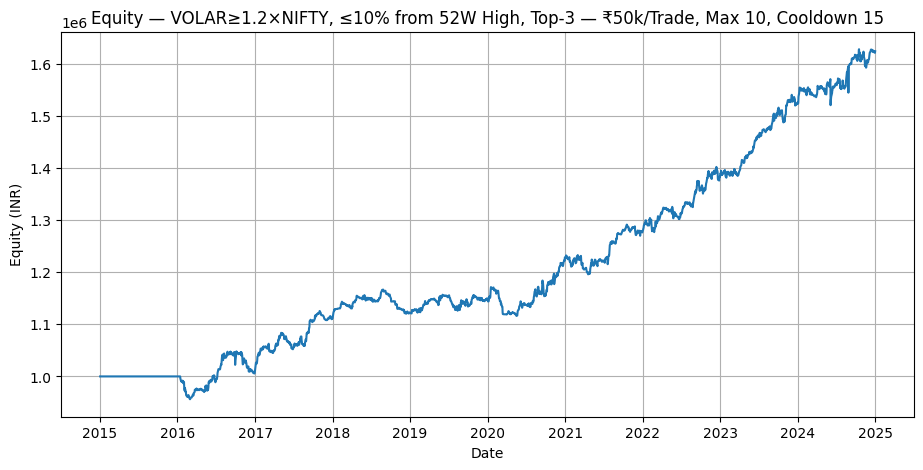

In [10]:

# RUN
nifty=fetch_daily(CFG["NIFTY_SYMBOL"], CFG["START"], CFG["END"])
if nifty.empty or len(nifty) < CFG["VOLAR_LOOKBACK"] + 5: raise RuntimeError("NIFTY data insufficient.")
nifty=add_core_indicators(nifty, CFG); nifty_rank=compute_volar_and_high_flags(nifty, CFG["VOLAR_LOOKBACK"], CFG["WITHIN_52W_PCT"])
universe, signals, ranks = {}, {}, {}
for tk in CFG["TICKERS"]:
    print("Loading:", tk)
    df=fetch_daily(tk, CFG["START"], CFG["END"])
    if df.empty or len(df) < CFG["VOLAR_LOOKBACK"] + max(CFG["SMA_LEN"], CFG["ATR_LEN"]) + 5:
        print("  Skipping:", tk); continue
    df=add_core_indicators(df, CFG); sig=generate_signals_daily(df, CFG); rf=compute_volar_and_high_flags(df, CFG["VOLAR_LOOKBACK"], CFG["WITHIN_52W_PCT"])
    universe[tk]=df; signals[tk]=sig; ranks[tk]=rf
trades_df, equity = simulate_portfolio(universe, signals, ranks, nifty_rank, CFG)
import pandas as pd
ts=pd.Timestamp.now().strftime("%Y%m%d_%H%M%S"); out_csv=os.path.join(CFG["OUT_DIR"], f"wr_macd_volarNIFTY_topN_costaware_{ts}.csv")
trades_df.to_csv(out_csv, index=False); print("Saved trades to:", out_csv)
metrics=compute_metrics(trades_df, equity, CFG["START_EQUITY"]); print("Metrics:", json.dumps(metrics, indent=2))
if len(equity)>0:
    ttl=f"Equity — VOLAR≥{CFG['VOLAR_NIFTY_MULT']}×NIFTY, ≤{int(CFG['WITHIN_52W_PCT']*100)}% from 52W High, Top-{CFG['TOP_N_RANKED']} — ₹50k/Trade, Max {CFG['MAX_OPEN_POS']}, Cooldown {CFG['COOLDOWN_BARS']}"
    plot_equity_curve(equity, ttl)
